Importing Libraries

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

Ploting Graph

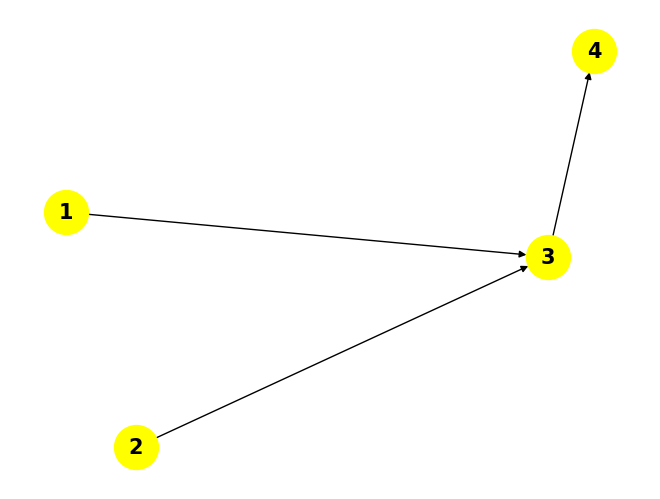

In [2]:
graph = {'1': ['3'],
         '2': ['3'],
         '3': ['4', '4'],  # we have 2 links from 3 to 4 here
         '4': []}

G = nx.DiGraph(graph)

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='yellow', node_size=1000, font_size=15, font_weight='bold')
plt.show()

Counting OD from start and end node

In [3]:
def find_paths(graph, start, end, path=[]):
    path = path + [start]
    if start == end:
        return [path]
    if start not in graph:
        return []
    paths = []
    for node in graph[start]:
        if node not in path:
            new_paths = find_paths(graph, node, end, path)
            for new_path in new_paths:
                paths.append(new_path)
    return paths


start_node = '1'
end_node = '4'
all_paths = find_paths(graph, start_node, end_node)
num_paths = len(all_paths)
print("OD count:", num_paths)
print(all_paths)

OD count: 2
[['1', '3', '4'], ['1', '3', '4']]


Calculating All Possible Paths

In [4]:
def find_all_paths(graph):
    all_paths = []
    for start_node in graph:
        for end_node in graph:
            if start_node != end_node:
                paths = find_paths(graph, start_node, end_node)
                all_paths.extend(paths)
    return all_paths



all_paths = find_all_paths(graph)

print('All path count:', len(all_paths))
for path in all_paths:
    print(path)

All path count: 8
['1', '3']
['1', '3', '4']
['1', '3', '4']
['2', '3']
['2', '3', '4']
['2', '3', '4']
['3', '4']
['3', '4']


In [5]:
def count_path_repetitions(all_paths):
    path_repetitions = {}
    for path in all_paths:
        path_str = ' -> '.join(path)
        if path_str not in path_repetitions:
            path_repetitions[path_str] = 1
        else:
            path_repetitions[path_str] += 1
    return path_repetitions

def count_edge_repetitions(path_repetitions):
    edge_repetitions = {}
    for path_str, repetitions in path_repetitions.items():
        nodes = path_str.split(' -> ')
        edges = [(nodes[i], nodes[i+1]) for i in range(len(nodes)-1)]
        for edge in edges:
            if edge not in edge_repetitions:
                edge_repetitions[edge] = repetitions
            else:
                edge_repetitions[edge] += repetitions
    return edge_repetitions

path_repetitions = count_path_repetitions(all_paths)

edge_repetitions = count_edge_repetitions(path_repetitions)

print("Link repetitions:")
for edge, repetitions in edge_repetitions.items():
    print(f"{edge}: {repetitions} times")

Link repetitions:
('1', '3'): 3 times
('3', '4'): 6 times
('2', '3'): 3 times


OD Possible Link Pairs

In [6]:
def format_path(path):
    formatted_path = [tuple(path[i:i+2]) for i in range(len(path)-1)]
    return formatted_path

def find_all_paths(graph):
    all_paths = {}
    for start_node in graph:
        for end_node in graph:
            if start_node != end_node:
                paths = find_paths(graph, start_node, end_node)
                formatted_paths = [format_path(path) for path in paths]
                if formatted_paths:
                    all_paths[(start_node, end_node)] = formatted_paths
    return all_paths


for pair, paths in find_all_paths(graph).items():
    for path in paths:
        print(f"{pair}: {path}")

('1', '3'): [('1', '3')]
('1', '4'): [('1', '3'), ('3', '4')]
('1', '4'): [('1', '3'), ('3', '4')]
('2', '3'): [('2', '3')]
('2', '4'): [('2', '3'), ('3', '4')]
('2', '4'): [('2', '3'), ('3', '4')]
('3', '4'): [('3', '4')]
('3', '4'): [('3', '4')]


In [7]:
output_list = []

def format_path(path):
    formatted_path = [tuple(path[i:i+2]) for i in range(len(path)-1)]
    return formatted_path

def find_all_paths(graph):
    all_paths = {}
    for start_node in graph:
        for end_node in graph:
            if start_node != end_node:
                paths = find_paths(graph, start_node, end_node)
                formatted_paths = [format_path(path) for path in paths]
                if formatted_paths:
                    all_paths[(start_node, end_node)] = formatted_paths
    return all_paths


for pair, paths in find_all_paths(graph).items():
    for path in paths:
        output_list.append((pair, path))
        
columns=[]
indexs = []
for i in range(len(output_list)):
    columns.append(output_list[i][0])
    indexs.append((output_list[i][1]))
indexs2 = [item for sublist in indexs for item in sublist]
indexs2 = list(set(indexs2))
incidence_df2 = pd.DataFrame(columns=columns, index=indexs2)
incidence_df2.fillna(0, inplace=True)
attribute = []
for i in range(len(incidence_df2.columns.tolist())):
    for test in incidence_df2.index.tolist():
        if test in indexs[i]:
            attribute.append(1)
        else:
            attribute.append(0)
            
for i in range(int(len(attribute)/len(incidence_df2.index))):
    subset = attribute[(len(incidence_df2.index)*i):(len(incidence_df2.index)*i)+(len(incidence_df2.index))]
    incidence_df2.iloc[:,i] = subset
    
incidence_df2['SUM'] = incidence_df2.sum(axis=1)
incidence_df2

,"(1, 3)","(1, 4)","(1, 4)","(2, 3)","(2, 4)","(2, 4)","(3, 4)","(3, 4)",SUM
"(1, 3)",1,1,1,0,0,0,0,0,3
"(3, 4)",0,1,1,0,1,1,1,1,6
"(2, 3)",0,0,0,1,1,1,0,0,3


Exporting files

In [9]:
incidence_df2.to_csv('incidence_matrix.csv')
incidence_df2.to_excel('incidence_matrix.xlsx')
incidence_df2.to_csv('incidence_matrix.txt', sep= '\t')